In [20]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

sns.set(rc={'figure.figsize':(10, 10)})

In [2]:
data = pd.read_csv('../data/full_trains_fixed.csv')

In [3]:
data

,year,month,service,departure_station,arrival_station,journey_time_avg,total_num_trips,num_of_canceled_trains,num_late_at_departure,avg_delay_late_at_departure,...,delay_cause_rolling_stock,delay_cause_station_management,delay_cause_travelers,num_greater_15_min_late,avg_delay_late_greater_15_min,num_greater_30_min_late,num_greater_60_min_late,departure_region,arrival_region,pct_cancelled
0,2017,9,National,PARIS EST,METZ,85.133779,299,0,15,11.550000,...,0.416667,0.166667,0.000000,6.0,24.033333,1.0,0.0,IDF,GE,0.000000
1,2017,9,National,REIMS,PARIS EST,47.064516,218,1,10,14.653333,...,0.125000,0.062500,0.062500,9.0,21.498148,1.0,0.0,GE,IDF,0.004587
2,2017,9,National,PARIS EST,STRASBOURG,116.234940,333,1,20,13.694167,...,0.285714,0.214286,0.000000,14.0,24.694048,3.0,0.0,IDF,GE,0.003003
3,2017,9,National,PARIS LYON,AVIGNON TGV,161.089583,481,1,36,20.988426,...,0.344828,0.034483,0.034483,40.0,34.047500,21.0,5.0,IDF,PACA,0.002079
4,2017,9,National,PARIS LYON,BELLEGARDE (AIN),164.452632,190,0,16,20.963542,...,0.305556,0.000000,0.027778,26.0,28.401282,8.0,1.0,IDF,ARA,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5457,2018,9,National,ANGOULEME,PARIS MONTPARNASSE,130.690840,262,0,127,5.837664,...,0.108696,0.000000,0.086957,15.0,4.893003,6.0,1.0,NAq,IDF,0.000000
5458,2018,9,National,TOULOUSE MATABIAU,PARIS MONTPARNASSE,263.584270,178,0,13,5.517949,...,0.240000,0.000000,0.040000,25.0,7.000936,10.0,1.0,O,IDF,0.000000
5459,2018,9,National,PARIS MONTPARNASSE,TOURS,78.931818,176,0,24,9.431944,...,0.250000,0.000000,0.000000,10.0,4.351136,5.0,1.0,IDF,CVDL,0.000000
5460,2018,9,National,PARIS MONTPARNASSE,LAVAL,89.436893,206,0,15,6.712222,...,0.500000,0.000000,0.000000,4.0,2.421278,0.0,0.0,IDF,PDLL,0.000000


In [4]:
data['pct_cancelled'] = data['num_of_canceled_trains'] / data['total_num_trips']

In [5]:
strikes_per_month = pd.read_csv('../data/mouvements-sociaux-depuis-1994.csv', sep=';')

In [6]:
strikes_per_month[['year','month']] = pd.DataFrame(strikes_per_month.Date.str.split('-').tolist(), index= strikes_per_month.index)

In [7]:
strikes_per_month = strikes_per_month.drop(columns=['Date'])

In [8]:
strikes_per_month

,Journées perdues,year,month
0,7869.00,1994,04
1,2860.00,1994,07
2,1424.00,1994,09
3,6442.00,1995,01
4,3643.00,1995,02
...,...,...,...
331,729.38,2019,01
332,327141.00,2019,12
333,158241.38,2020,01
334,2317.75,2021,01


In [9]:
strikes_per_month['year'] = strikes_per_month['year'].astype(int)
strikes_per_month['month'] = strikes_per_month['month'].astype(int)

In [10]:
strikes_per_month = strikes_per_month[(strikes_per_month.year > 2014) & (strikes_per_month.year < 2019)].sort_values(['year', 'month'])

In [11]:
strikes_per_month.reset_index(inplace=True, drop=True)

In [12]:
strikes_per_month

,Journées perdues,year,month
0,10355.00,2015,1
1,2387.00,2015,2
2,17168.00,2015,3
3,14169.00,2015,4
4,2128.00,2015,5
5,17072.00,2015,6
6,4135.00,2015,7
7,3238.00,2015,8
8,1845.00,2015,9
9,17234.00,2015,10


In [13]:
data

,year,month,service,departure_station,arrival_station,journey_time_avg,total_num_trips,num_of_canceled_trains,num_late_at_departure,avg_delay_late_at_departure,...,delay_cause_rolling_stock,delay_cause_station_management,delay_cause_travelers,num_greater_15_min_late,avg_delay_late_greater_15_min,num_greater_30_min_late,num_greater_60_min_late,departure_region,arrival_region,pct_cancelled
0,2017,9,National,PARIS EST,METZ,85.133779,299,0,15,11.550000,...,0.416667,0.166667,0.000000,6.0,24.033333,1.0,0.0,IDF,GE,0.000000
1,2017,9,National,REIMS,PARIS EST,47.064516,218,1,10,14.653333,...,0.125000,0.062500,0.062500,9.0,21.498148,1.0,0.0,GE,IDF,0.004587
2,2017,9,National,PARIS EST,STRASBOURG,116.234940,333,1,20,13.694167,...,0.285714,0.214286,0.000000,14.0,24.694048,3.0,0.0,IDF,GE,0.003003
3,2017,9,National,PARIS LYON,AVIGNON TGV,161.089583,481,1,36,20.988426,...,0.344828,0.034483,0.034483,40.0,34.047500,21.0,5.0,IDF,PACA,0.002079
4,2017,9,National,PARIS LYON,BELLEGARDE (AIN),164.452632,190,0,16,20.963542,...,0.305556,0.000000,0.027778,26.0,28.401282,8.0,1.0,IDF,ARA,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5457,2018,9,National,ANGOULEME,PARIS MONTPARNASSE,130.690840,262,0,127,5.837664,...,0.108696,0.000000,0.086957,15.0,4.893003,6.0,1.0,NAq,IDF,0.000000
5458,2018,9,National,TOULOUSE MATABIAU,PARIS MONTPARNASSE,263.584270,178,0,13,5.517949,...,0.240000,0.000000,0.040000,25.0,7.000936,10.0,1.0,O,IDF,0.000000
5459,2018,9,National,PARIS MONTPARNASSE,TOURS,78.931818,176,0,24,9.431944,...,0.250000,0.000000,0.000000,10.0,4.351136,5.0,1.0,IDF,CVDL,0.000000
5460,2018,9,National,PARIS MONTPARNASSE,LAVAL,89.436893,206,0,15,6.712222,...,0.500000,0.000000,0.000000,4.0,2.421278,0.0,0.0,IDF,PDLL,0.000000


<AxesSubplot:xlabel='departure_region'>

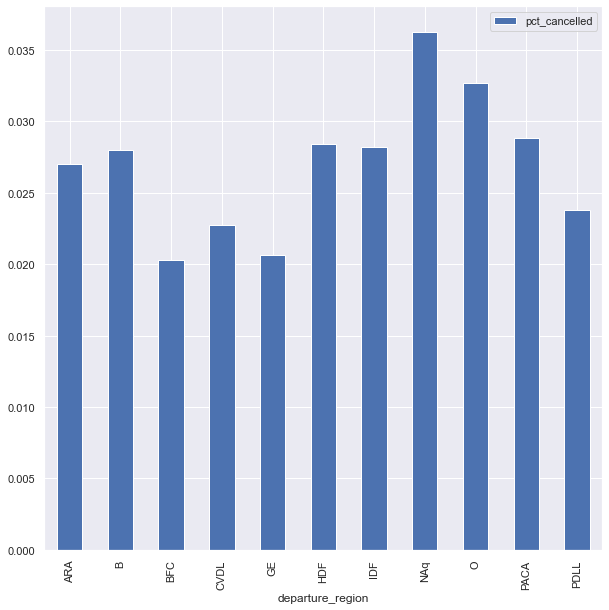

In [21]:
data[data['service'] == 'National'].groupby('departure_region')[['pct_cancelled']].mean().plot(kind='bar')

In [15]:
data[data['service'] == 'National'].groupby(['departure_region', 'month'])[['pct_cancelled','journey_time_avg']].mean()

pct_cancelled  journey_time_avg
departure_region month                                 
ARA              1           0.007199        175.743607
                 2           0.002266        175.823807
                 3           0.013933        176.698235
                 4           0.093026        176.173362
                 5           0.080760        176.531639
...                               ...               ...
PDLL             8           0.007436        140.545800
                 9           0.001582        139.795260
                 10          0.001672        141.608274
                 11          0.006988        140.252772
                 12          0.013607        140.811039

[132 rows x 2 columns]

In [16]:
data[data['service'] == 'National'][['departure_region','month','pct_cancelled','journey_time_avg']]

,departure_region,month,pct_cancelled,journey_time_avg
0,IDF,9,0.000000,85.133779
1,GE,9,0.004587,47.064516
2,IDF,9,0.003003,116.234940
3,IDF,9,0.002079,161.089583
4,IDF,9,0.000000,164.452632
...,...,...,...,...
5457,NAq,9,0.000000,130.690840
5458,O,9,0.000000,263.584270
5459,IDF,9,0.000000,78.931818
5460,IDF,9,0.000000,89.436893


In [17]:
data[data['service'] == 'National'].groupby(['departure_station', 'arrival_station'])[['pct_cancelled']].mean()

pct_cancelled
departure_station   arrival_station                    
AIX EN PROVENCE TGV PARIS LYON                 0.015872
ANGERS SAINT LAUD   PARIS MONTPARNASSE         0.025966
ANGOULEME           PARIS MONTPARNASSE         0.036055
ANNECY              PARIS LYON                 0.034212
ARRAS               PARIS NORD                 0.034188
...                                                 ...
TOURCOING           BORDEAUX ST JEAN           0.044160
                    MARSEILLE ST CHARLES       0.053290
TOURS               PARIS MONTPARNASSE         0.018644
VALENCE ALIXAN TGV  PARIS LYON                 0.030114
VANNES              PARIS MONTPARNASSE         0.029140

[114 rows x 1 columns]

In [18]:
data[data['departure_region'] == 'PACA'].groupby(['departure_station', 'arrival_station'])[['pct_cancelled']].mean()

pct_cancelled
departure_station    arrival_station               
AIX EN PROVENCE TGV  PARIS LYON            0.015872
AVIGNON TGV          PARIS LYON            0.019147
MARSEILLE ST CHARLES LILLE                 0.024578
                     LYON PART DIEU        0.035474
                     MADRID                0.183267
                     MARNE LA VALLEE       0.065691
                     PARIS LYON            0.017489
                     TOURCOING             0.072396
NICE VILLE           PARIS LYON            0.035402
TOULON               PARIS LYON            0.034969

<AxesSubplot:xlabel='departure_station,arrival_station'>

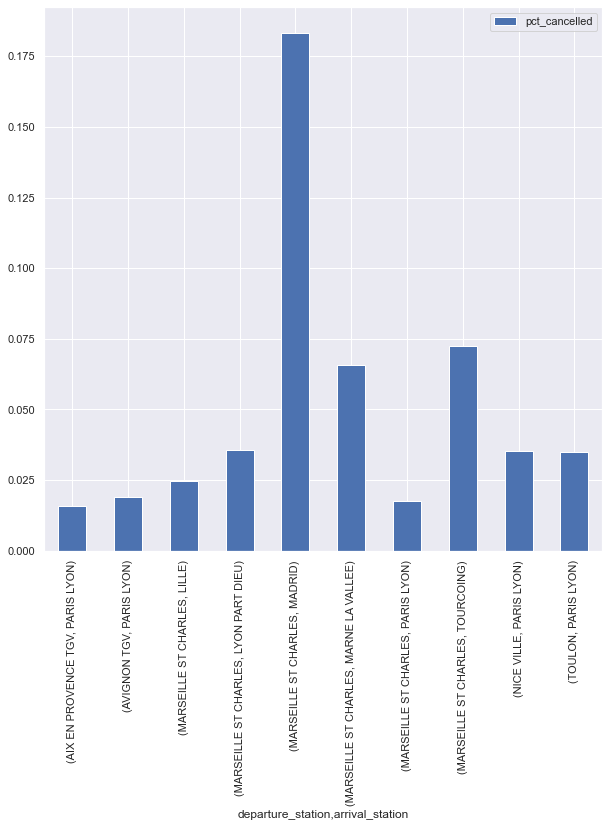

In [22]:
data[data['departure_region'] == 'PACA'].groupby(['departure_station', 'arrival_station'])[['pct_cancelled']].mean().plot(kind='bar')

<AxesSubplot:xlabel='departure_station,arrival_station'>

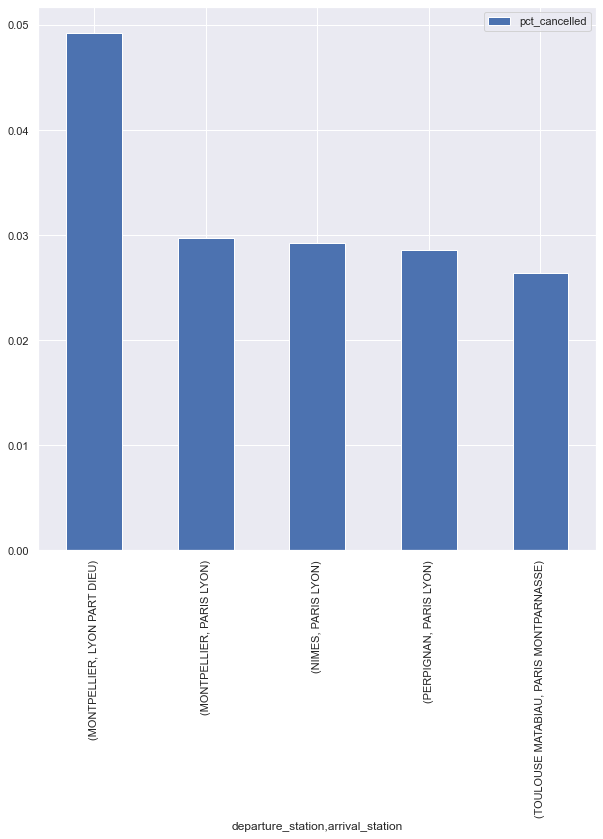

In [23]:
data[data['departure_region'] == 'O'].groupby(['departure_station', 'arrival_station'])[['pct_cancelled']].mean().plot(kind='bar')

<AxesSubplot:xlabel='departure_station,arrival_station'>

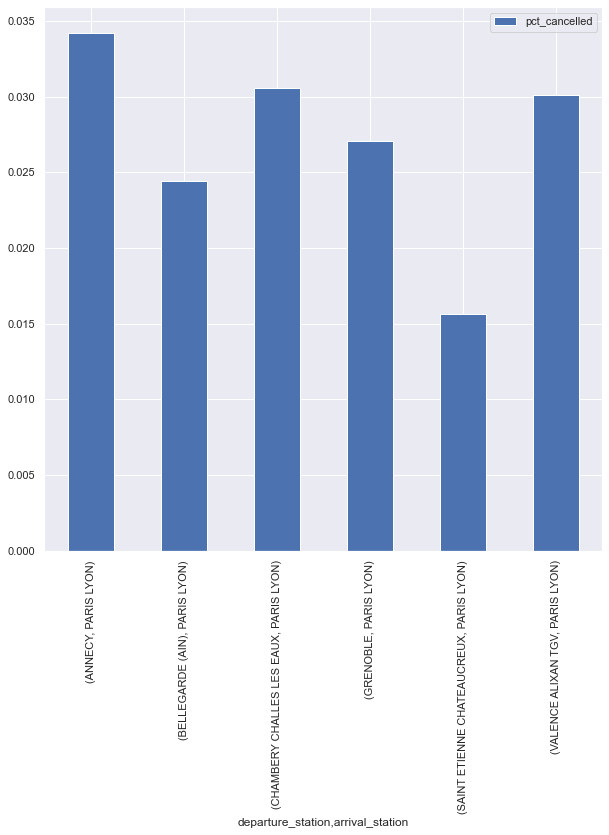

In [24]:
data[data['departure_region'] == 'ARA'].groupby(['departure_station', 'arrival_station'])[['pct_cancelled']].mean().plot(kind='bar')

<AxesSubplot:xlabel='departure_station,arrival_station'>

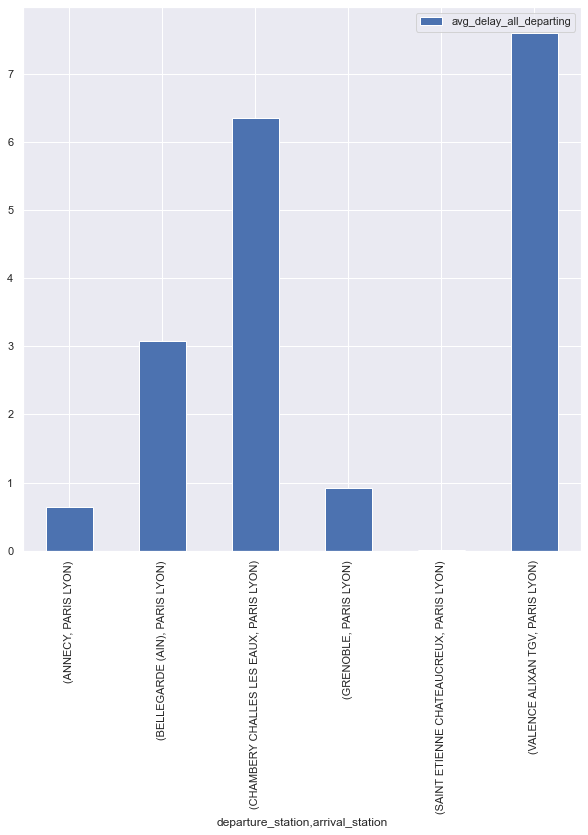

In [25]:
data[data['departure_region'] == 'ARA'].groupby(['departure_station', 'arrival_station'])[['avg_delay_all_departing']].mean().plot(kind='bar')

<AxesSubplot:xlabel='departure_station,arrival_station'>

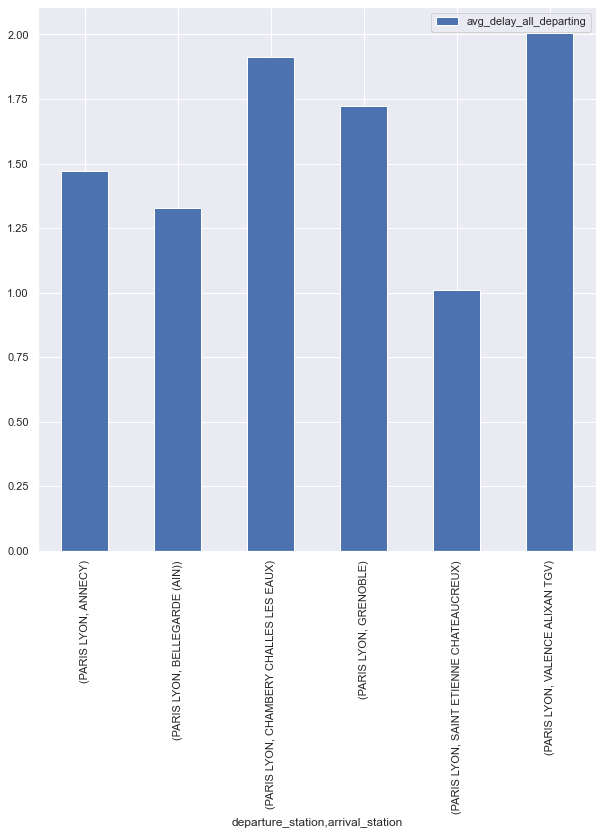

In [26]:
data[data['arrival_region'] == 'ARA'].groupby(['departure_station', 'arrival_station'])[['avg_delay_all_departing']].mean().plot(kind='bar')